# Asset classes

Financial markets can be distinguished based upon several criteria. We try to get an overview when categorizing financial markets by asset class. An asset is anything of value or a resource of value that can be owned or controlled to produce positive economic value for its owner or holder. In a broader economic sense, assets are crucial because they can be used to generate income, reduce expenses, or store value for future use. The concept of an asset is foundational in finance, accounting, and economics, guiding how individuals, businesses, and governments evaluate and manage their resources.

Financial markets by asset class may be split into:

* Equity markets (Stock markets): These markets deal with the trading of company shares or stock, including the primary market for new issues (IPOs) and the secondary market for trading existing securities. Major stock markets include the New York Stock Exchange (NYSE), Nasdaq, Tokyo Stock Exchange, and Shanghai Stock Exchange, with the NYSE being the largest in terms of total market capitalization.
* Debt markets (Bond markets): Markets for trading debt instruments, such as government bonds, corporate bonds, and other types of debt financing. This market is crucial for governments and corporations to raise funds for various purposes, from infrastructure projects to operational financing.
* Derivatives Markets: markets for trading contracts that derive their value from underlying assets, such as futures, options, and swaps. The derivatives market is vast and complex, with a notional value that far exceeds both the equity and bond markets (both are estimated around $100 trillion). Estimates of the global derivatives market range from hundreds of trillions to over a quadrillion dollars in notional value. Derivatives include futures, options, swaps, and other complex financial instruments used for hedging, speculation, and leveraging financial positions.
* Foreign Exchange (Forex) markets: Markets for trading currencies, facilitating currency conversion for international trade and investments. The forex market is the largest financial market in the world. This market operates 24 hours a day, facilitating currency trading and conversion around the globe.
* Commodity markets: Markets for trading physical goods or raw products, such as gold, oil, or agricultural products. The size of commodity markets can vary greatly depending on the specific commodity (e.g., oil, gold, agricultural products). The total trading volume in commodities markets is in the trillions of dollars annually. Commodities are fundamental to the global economy, impacting industries, energy, food, and manufacturing.
* Cryptocurrency markets: These are digital financial marketplaces where cryptocurrencies, such as Bitcoin, Ethereum, and many others, are traded. Further assets on these markets are various financial products and services within the blockchain and decentralized finance (DeFi) spaces, such as tokenized assets, stablecoins, and financial services that operate without traditional intermediaries. The cryptocurrency market is relatively small compared to traditional financial markets, but it has experienced rapid growth since its inception. The total market capitalization of all cryptocurrencies has fluctuated significantly, reaching over $2 trillion during its peak periods. Despite its smaller size, the cryptocurrency market is notable for its volatility, innovation, and the wide interest it has garnered among investors and technologists.

Capturing all asset classes and their foundations is beyond the scope of a single course. In this course, we mainly focus on the equity market. Besides, we include bonds and options as they represent traditional asset classes as well. Nevertheless, later in this course we aim to analyze mechanisms between different asset classes and include asset classes such as, e.g., FX or cryptocurrencies.

## Stocks 

Stocks (or Equities) represent ownership in a company. When you buy a stock, you become a shareholder, meaning you own a portion of the company. Shares refer to the individual units of ownership within a stock. A stock is the broad term, while shares denote specific units of it.

Companies issue stocks primarily to raise capital for growth, expansion, or paying off debts. This process is done through either initial public offerings (IPOs) or secondary offerings. Stocks can be categorized into common and preferred stocks:
* Common stocks provide ownership, voting rights, and potential dividends but carry higher risk.
* Preferred stocks offer a higher claim on company assets and fixed dividends but usually lack voting rights.

Stocks are traded on exchanges such as the New York Stock Exchange (NYSE), Nasdaq, and London Stock Exchange (LSE). Some companies distribute a portion of their profits to shareholders in the form of dividends. Stock markets typically close overnight, on weekends, and on certain holidays. However, some markets offer pre-market and after-hours trading, though these sessions usually have lower liquidity.

Stocks are offered at an **ask price** — the price set by a seller — and demanded at a **bid price** — the price a buyer is willing to pay. A transaction occurs when the bid and ask prices match, either because:
* The actual bid and ask prices overlap, or
* A buyer agrees to pay a higher price or a seller accepts a lower price. 

Wider bid-ask spreads (usually the difference between ask and bid prices) indicate less liquidity, because they make it more expensive to trade, as traders must buy higher and sell lower than during regular hours. The total amount of shares traded within a period is called **volume**. 

There are multiple ways to determine the value of a stock. Market participants typically use a combination of methods. Stock valuation can generally be categorized into absolute and relative approaches:
* Absolute valuation methods estimate a stock’s intrinsic value by projecting future cash flows and discounting them to the present using a discount rate. Common models include:
	* Discounted Cash Flow (DCF) Model
	* Dividend Discount Model (DDM) (for dividend-paying stocks)
* Relative valuation compares a stock’s price to similar companies based on financial metrics such as:
	* Price-to-Earnings (P/E) Ratio
	* Price-to-Book (P/B) Ratio
	* EV/EBITDA Ratio

In financial markets, price movements within a given period are often summarized using Open-High-Low-Close (OHLC) prices, typically accompanied by trading volume.
* Open price: The price at the start of the period.
* Close price: The price at the end of the period.
* High price: The highest price observed during the period.
* Low price: The lowest price observed during the period.

Among these, the close price is commonly used to represent a stock’s market value at time  t .

Investors can participate in the stock market in two main ways:
*	Direct investment in individual company stocks.
*	Exchange-traded funds (ETFs), which allow investment in a diversified portfolio of stocks.

To track the overall stock market performance, investors frequently analyze broad stock market indices. Indices aggregate the price movements of selected stocks based on predefined rules, providing insight into market trends.

For example:
* S&P 500: Tracks the performance of the 500 largest U.S. companies, weighted by market capitalization (i.e., total outstanding shares × stock price).
* S&P 400 & S&P 600: Represent mid-cap and small-cap U.S. companies, respectively.
* STOXX 600: Covers small, mid, and large-cap stocks from 17 European countries.

Since an index itself is not directly investable, investors can gain exposure through ETFs that replicate the index’s performance. Let us denote the share price or index value by $S_t$. It can be used to quantify and visualize the value development of stocks over time. However, raw stock prices are difficult to compare across assets due to different values and exhibit undesirable statistical properties. The plot below illustrates the price movements of the S\&P 500 (SPX) and the STOXX 600 over time. The left plot only displays absolute index values which demonstrate the issues which arise if the indices are at different levels. For better comparability, we can normalize the index value at each time step by the starting value.

$$
S_t^{*} = \frac{S_t}{S_1}
$$

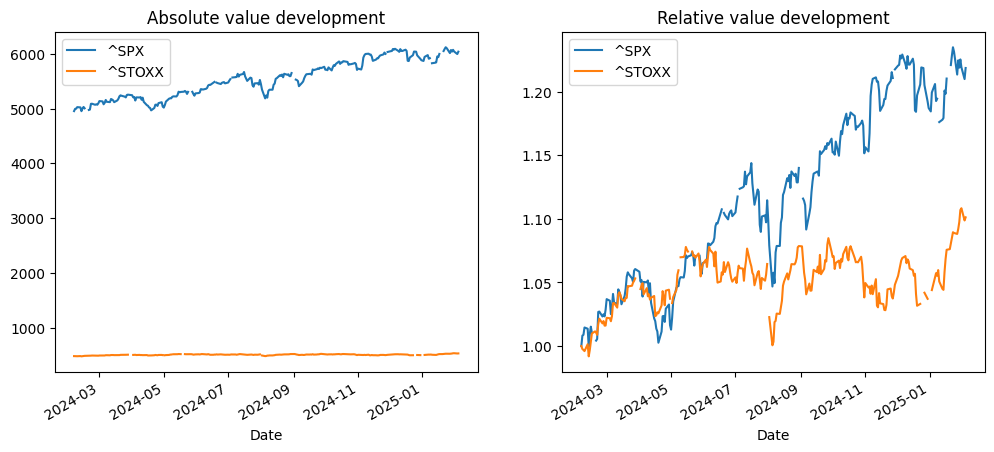

In [32]:
import yfinance as yf
import matplotlib.pylab as plt
import pandas as pd

try:
    close_prices = pd.read_csv("../data/chapter_01/00_data.csv")
    close_prices.index = pd.to_datetime(close_prices["Date"])
    close_prices.drop(["Date"], axis = 1, inplace=True)
except:
    tickers = ["^SPX", "^STOXX"]
    today = pd.Timestamp.today().normalize()
    one_year_ago = today - pd.DateOffset(days=365)

    ohlc_data = yf.download(tickers, start = one_year_ago, end = today)
    close_prices = ohlc_data.loc[:, "Close"]
    close_prices.to_csv("../data/chapter_01/00_data.csv")

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
index_development = close_prices.plot(ax = axs[0], title = "Absolute value development")
relative_index_development = close_prices.divide(close_prices.loc[close_prices.index[0]]).plot(ax = axs[1], title = "Relative value development")


To facilitate comparisons, returns are often used instead of prices. The discrete return $R_t$ over a fixed time period is given by:

$$
R_t = \frac{S_t - S_{t-1}}{S_{t-1}} = \frac{S_t}{S_{t-1}} - 1
$$

```{note}
Usually one distinguishes between a random variable $S_t$ and a realization $s_t$ by using large or small letters. A formal definition of a random variable is presented in the next chapter.  
```

The discrete return represents the percentage change in price from one period to the next. The corresponding plot below shows these returns, which fluctuate around zero and remain within a bounded numerical range. These properties make returns more useful for statistical analysis. 

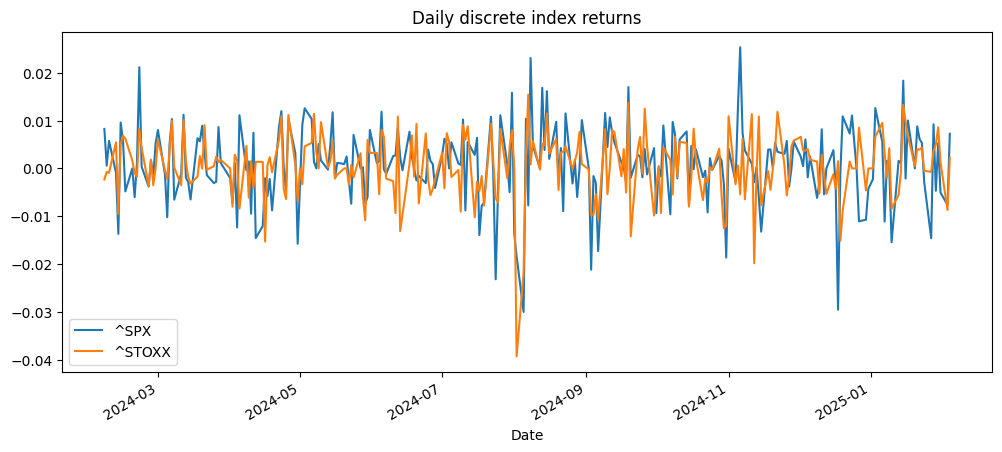

In [6]:
daily_returns = close_prices.ffill().pct_change().iloc[1:, :]
daily_returns_plt = daily_returns.plot(title = "Daily discrete index returns", figsize = (12, 5))

Since stock prices evolve continuously in financial markets, log-returns are often preferred. The log-return $Z_t$ is defined as:

$$
Z_t = \ln \left( \frac{S_t}{S_{t-1}} \right) = \ln S_t - \ln S_{t-1}
$$

For small price changes, discrete and log-returns are nearly identical. However, for large fluctuations, log-returns are smaller in magnitude due to the logarithmic transformation. The relationship between the two return measures is:

$$
S_t = \ln (1 + R_t), \quad R_t = e^{R_t} - 1
$$

Log-returns have useful mathematical properties, particularly additivity over time, making them advantageous for certain financial models and statistical analyses. At an initial investment $N_0$ at time $t=0$, the value in time can be determined by discrete or log-returns. For discrete returns, the value is given by the cumulative product:

$$
V_t = N_0 \prod_{t' \leq t} \left(1 + R_{t'}\right)
$$

When using log-returns, the value can be determined by:

$$
V_t = N_0 e^{ \sum_{t' \leq t} Z_{t'}}
$$

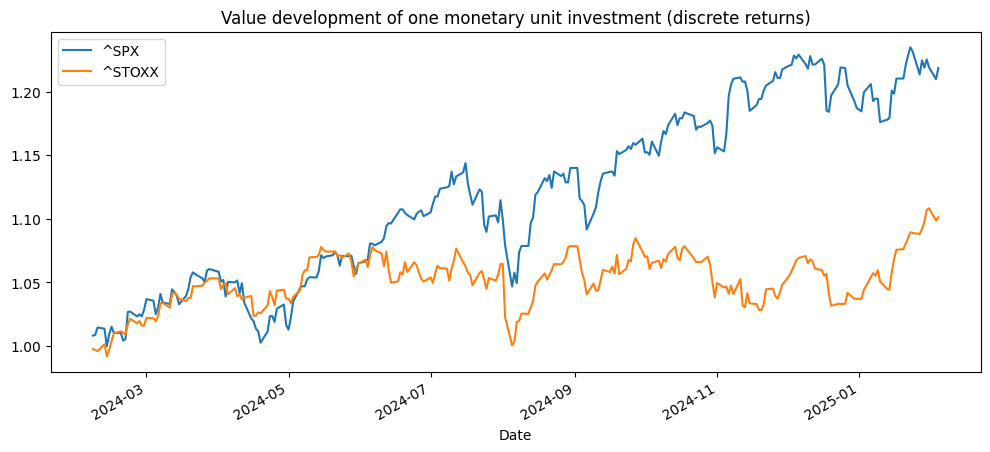

In [7]:
values_plt = daily_returns.add(1.).cumprod().plot(title = "Value development of one monetary unit investment (discrete returns)", figsize = (12, 5))

### Mutual Funds

### Exchange Traded Funds

## Bonds

The bond market is interesting by itself, but, also because of its interplay with the stock market. While there are many interesting details about bonds and the bond market, we focus on some fundamental aspects. We examine essential characteristics to understand what drives the value of bonds, their dependence to interest rates and what makes them interesting analytical complements to the stock market.

A bond is another way to collect funding. It can be used by financial entities such as governments or corporations. The financial entity is the seller (also called issuer) of the bond and sells the bond to the investor with the promise to pay her the *face or par value* at the end of *maturity* plus potentially other regular (typically annually or semi-annually) payments until maturity called *coupon* payments. 

This means, selling a bond is equal to lending money from others and that is the fundamental difference to selling stocks. While selling stocks enables investors to buy shares of a company's equity value, selling bonds increases the company's liabilities, thus, its leverage captured by the ratio of liabilities to equities.

To understand the value of bonds and how to determine bond returns, we first need to agree upon the concept of *discounting*, i.e., determining today's value of future cash flows. Assume you have the chance to invest into something by spending $100$ monetary units today at $t=0$ and collecting a cash flow of $105$ at the next time step $t=1$. The discrete return of this investment is $5\%$. This implies that something worth $105$ in the future at $t=1$ is worth $100$ today at $t=0$, given a return of $5\%$. This can be brought to a general formula:

$$
V_0 = \frac{C_{t}}{1 + r_{t}}
$$

with $V_0$ being the value at $t=0$ of cash flow $C_t$ at $t$. If we extend this to multiple time steps $T$, the formula becomes:

$$
V_0 = \sum_{t=1}^T \frac{C_{t}}{1 + r_{t}}
$$

where returns $r_t$ can vary across periods. Assuming a constant return between each time period $r$, we get:

$$
V_0 = \sum_{t=1}^T \frac{C_{t}}{\left(1 + r\right)^t}
$$

### Zero-coupon bonds

With these concepts in mind, we can apply them to bond valuation. There are two fundamentally different types of bonds, *zero-coupon bonds* and *coupon bonds*. A zero-coupon bond makes a single payment to the holder at maturity. At maturity, the bondholder receives the par value, which is predetermined at issuance. The bond is initially issued at a discount, and its price increases over time based on the agreed-upon interest rate. The interest rate can be compounded at different time frequencies such as annually or semi-annually. For instance, today's value (at $t=0$) for a zero-coupon bond with a par value of 1000 and an interest rate of 5\% with annual compounding and a maturiy of one year has a value equal to:

$$
V_0 = \frac{1000}{1 + 0.05} = 952.38
$$

If compounding is done semi-annually, the interest rate per half-year is 2.5\% and today's value of the zero-coupon bond is:

$$
V_0 = \frac{1000}{\left(1 + 0.025\right)^2} = 951.81
$$

Since semi-annual compounding means earning 2.5% twice, the total return is slightly greater than 5% due to the compounding effect:

$$
\frac{1000}{951.81} - 1 = 0.051
$$ 

It is also possible to agree upon continuos compounding which leads to a value of:

$$
\frac{1000}{e^{0.05}} = 951.23
$$

As time to maturity decreases, the bond price converges to its par value due to the reduced discounting effect. Assume you bought the bond for $951.81$ and the interest rate remains stable. The value of the bond half a year before it matures is:

$$
V_0 = \frac{1000}{\left(1 + 0.025\right)} = 975.61
$$

Thus, the value of the bond increased by:

$$
\frac{975.61}{951.81} - 1 = 0.025
$$

As long as you hold your bond until the end of maturity and collect the par value of 1000, your relative income is predictable and fixed. Note that this is only true if the bond issuer is not defaulting, i.e., is able to meet its obligations at maturity. Another important characteristic is that interest rates and bond prices have an inverse relationship. The higher the rate, the more today's value is diminished by discounting effects.

If we sum, this up, for a zero-coupon bond, we note that
* The relationship between interest rates and bond prices is inverse, this means, higher interest rates reduce the price of the bond
* An investor who must sell early faces price risk, but a buy-and-hold investor does not.

In general, the value of a zero-coupon bond is equal to:

$$
V_0 = \frac{N}{(1 + r)^T}
$$

for discrete compounding, and, 

$$
V_0 = \frac{N}{e^{rT}} = N e^{-rT}
$$

for continuous compounding. Here, $r$ and $T$ correspond to the same frequency, e.g., if $r$ is the annual rate, $T$ is the maturiy in years.

### Coupon bonds

Coupon bonds make periodic interest payments, known as *coupons*, throughout their lifetime. At maturity, the bondholder receives the final coupon payment along with the par value.

For example, consider a coupon bond with a maturity of five years, a par value of $1000$, and an annual coupon rate of $5\%$. The bondholder receives the following cash flows:

$$
(50, 50, 50, 50, 50 + 1000)
$$

Since these cash flows occur at different points in time, we discount them to determine the present value of the bond. Assuming an annual rate of $5\%$, the bond’s value at issuance (if issued at par) is:

$$
V_0 = \sum_{t = 1}^{5} \frac{50}{(1 + 0.05)^t} + \frac{1000}{(1 + 0.05)^5} = 1000.
$$

In general, the present value of a coupon bond is given by:

$$
V_0 = \sum_{t = 1}^{T} \frac{C}{(1 + r)^t} + \frac{N}{(1 + r)^T},
$$

where:
- $C$ is the periodic coupon payment,
- $N$ is the par value paid at maturity,
- $r$ is the yield to maturity (YTM), and
- $T$ is the total number of periods.

As with zero-coupon bonds, an **inverse relationship** exists between bond price and interest rates: when rates rise, bond prices fall, and vice versa. At issuance, the bond is priced at par which is how the rate is determined (in the example above, $r = 0.05$ such that discounted cash flows equal the par value).


### Yield to maturity

The numerical examples for the values of zero and coupon bonds demonstrate how their value is determined using a specific rate for discounting. At issuance this rate is specified and depends on factors such as base rates from central banks or solvency of the issuer. Usually higher base rates increase rates of bond contracts (thus decreasing their value). Furthermore, the greater the risk of a bond issuer not being able to pay its obligations, the higher the rate must be for finding investors to purchase the bond and bearing this credit risk (thus again decreasing today's value of the bond).

However, once bonds have been issued and are held by investors, externalities that impact bond prices may change which alters the current value of bond contracts. Usually, we only observe current prices of bonds and know about their contract specifics such as the maturity, coupon payments, coupon dates, etc. Take a look at the zero-coupon bond from the example above. Originally, its (semi-annual) rate has been $r = 0.025$. Thus, according to its initial contract design, its value half a year before maturity should be:

$$
V_0 = \frac{1000}{\left(1 + 0.025\right)} = 975.61
$$

However, what if the interest rate environment changed since its issuance and currently zero-coupon bonds with the same maturity (and solvency) are offered at a price of $961.54$? At this moment, the current value of your bond is the same because if you would like to sell it, no rationale investor will pay you more. But what is the internal rate of return for this bond if an investor purchases it at a price of $961.54$. Let $y$ denote the internal rate of return. Under discrete compounding, we know that:

$$
V_t = \frac{N}{(1 + y)^{T - t}} 
$$

Thus, $y$ can be determined if we know about the current price $V_t$, the maturity $T$ and the par value $N$ by solving for $y$:

$$
y = \left( \frac{N}{V_t} \right)^{\frac{1}{T-t}} - 1
$$

For our example, we know $N = 1000, V_1 = 961.54$, $T = 2$ (two half years) and $t=1$ (in our example half a year has passed, half a year ahead until maturity). This implies an internal rate of return of $y = 0.04$. In general, this is called the *yield to maturity* or just *yield*, however, for zero-coupon bonds, this is also called the *spot rate*. 

For coupon bonds, the principle to determine the yield is the same, but, gets more complicated due to coupon payments during maturity. For instance, assume a coupon bond with a current price of $1036.30$, four outstanding (annual) coupon payments $C = 50$ and a final payment $N = 1000$. To determine the yield, we solve for $y$ in the equation:

$$
\sum_{t = 1}^{4} \frac{50}{(1 + y)^t} + \frac{1000}{(1 + y)^4} = 1036.30.
$$

In this example, numerical methods (such as trial and error or mathematical algorithms) yield an approximate solution of $r = 4\%$. The yield to maturity represents a single discount rate that equates the bond’s price to its future cash flows. However, we can also view a coupon bond as a collection of zero-coupon bonds, each with different maturities and corresponding *spot rates*. Under this approach, the value of the bond is:

$$
V_0 = \sum_{t = 1}^{T} \frac{C}{(1 + y_t)^t} + \frac{N}{(1 + y_T)^T},
$$

where $y_t$ represents the spot rate for time $t$. Unlike the yield to maturity, which applies a single rate to all cash flows, this approach discounts each cash flow using its respective spot rate. Thus, the yield to maturity of a coupon bond can be interpreted as a *weighted average of spot rates* for zero-coupon bonds with different maturities, where the weights depend on the present values of each cash flow.

As we learned about different return based concepts, let us try to summarize:

* When a bond is issued, its key characteristics are maturity, par value, coupon payments (for a coupon bond), compounding frequency, and yield to maturity (YTM). The yield to maturity can be interpreted as the discount rate that equates the present value of the bond’s future cash flows to its current price.

* At the time of issuance, this discount rate equals the yield to maturity. However, as market conditions change — such as shifts in interest rates or credit risk — the bond’s price deviates from its expected path. This, in turn, alters its yield to maturity.

* To track these changes, we can calculate discrete or log-returns of bond prices, similar to stocks. For instance, monthly price changes of bonds. The key difference is that bond cash flows (coupons and principal repayment) are predictable, as their timing is fixed.

* If all conditions affecting the bond’s value remain unchanged, its expected return equals its yield to maturity. However, if market conditions fluctuate — leading to changes in interest rates, credit spreads, or reinvestment opportunities — the bond’s price will adjust, making it a risky investment with an uncertain future value before maturity.

### Term structure

An important aspect when analyzing the bond market is the *term structure* which analyzes the impact of maturity on bond prices. Keeping other externalities constant, investors usually demand higher returns for bonds with longer maturity. The reason for this is that cash flows in the distant future are more uncertain which increases risk. If is important to note that only bonds with identical or at least very similar solvency can be compared with respect to maturity. For instance, bonds of companies with very little default risk. In the center of term structure analysis are *risk free* bonds, usually government bonds. They are called risk free, because except for a few exceptions, governments do not default, thus, the risk of not receiving cash flows when holding the bond until maturity is practically as good as zero. Furthermore, as we are going to learn in later chapters, according to modern portfolio theory, investors invest into a mix of risk free and risky assets. This makes the yields of risk free assets such as government bonds a very integral part of investing.

In reality, the yield curve sometimes deviates from an upward sloping behavior, and is a valuable tool for financial data analysis. For instance, the figure below demonstrates three empirical shapes at different points in time. On March 5 in 2012, the yield curve exhibits a typical upward sloping behavior capturing investors demand for higher yields if cash flows are more distant (and thus more uncertain). However, at the other dates we observe a u-shaped and even a downwar sloping behavior as well.

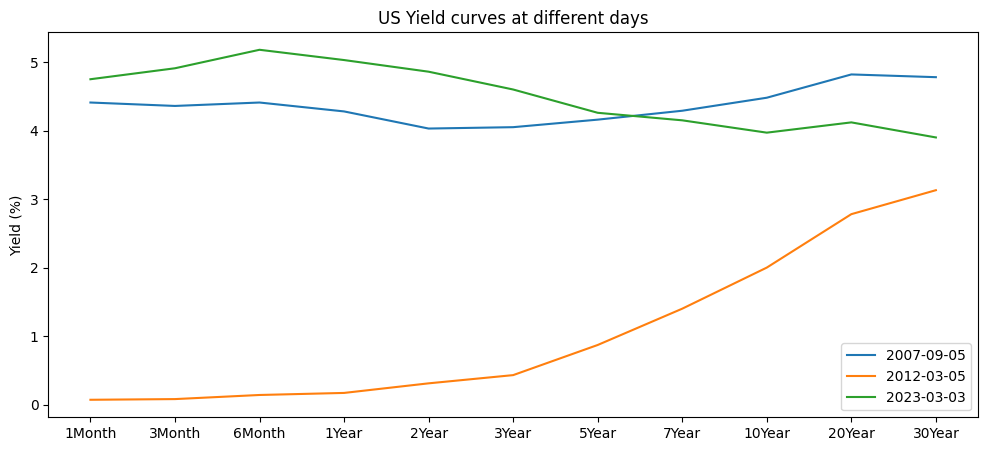

In [3]:
from config import fred_api_key
from fredapi import Fred
import pandas as pd
import matplotlib.pylab as plt

try:
    df = pd.read_csv("../data/chapter_01/01_yield_data.csv")
    df.index = pd.to_datetime(df["Unnamed: 0"])
    df.drop(["Unnamed: 0"], axis = 1, inplace = True)
except:
    fred = Fred(fred_api_key)
    symbols = ["DGS1MO", "DGS3MO", "DGS6MO", "DGS1", "DGS2", "DGS3", "DGS5", "DGS7", "DGS10", "DGS20", "DGS30"]
    data = {}
    for symbol in symbols:
        data[symbol] = fred.get_series(symbol, observation_start="1995-01-01", frequency="d")
    df = pd.DataFrame(data)
    df.columns = ["1Month", "3Month", "6Month", "1Year", "2Year", "3Year", "5Year", "7Year", "10Year", "20Year", "30Year"]
    df.to_csv("../data/chapter_01/01_yield_data.csv")

fig, ax = plt.subplots(figsize = (12, 5))

dates = ["2007-09-05", "2012-03-05", "2023-03-03"]
for date in dates:
    ax.plot(df.loc[pd.to_datetime(date)].index, df.loc[pd.to_datetime(date)].values, label = date)
ax.set_title("US Yield curves at different days")
ax.set_ylabel("Yield (%)")
plt.legend()
plt.show()

The shape of the yield curve is often interpreted in different ways and used to derive market expectations. Even though, this does not be true, one usually derives:

* Upward sloping: economic expansion
* Downward sloping: signal for recession 
* Flat: economic uncertainty
 
For instance an inverted (downward sloping) yield curve may imply investors' expectation that yields are going to be lower in the future. This may be due to reduced base rates of central banks which are often used as a tool to stimulate the economy during harsh economic conditions. However, even though inverted yield curves have been observed before before major economic recession in the past decades, it is not certain that a recession must follow. For instance, if you take a look at the figure below, you can see that the yield curve has been inverted for a longer period from 2021-2023 as result for base rate increases by the Federal Reserve in the US to combat inflation. Until today no recession followed. Nevertheless tracking the yield curve by yield differences of short and long term bonds can help us to identify changes in market expectations of investors, e.g., expectations about future monetary policy, inflation or recession.

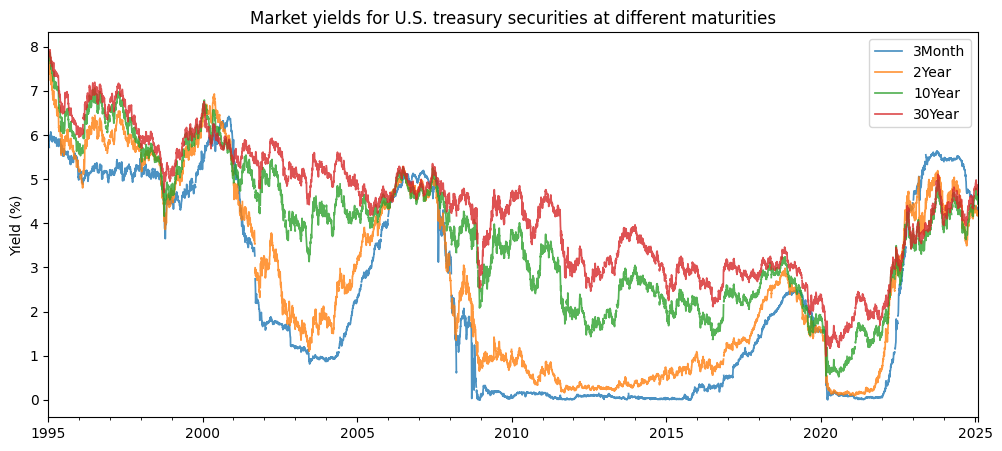

In [4]:
yields_plot = df.get(["3Month", "2Year", "10Year", "30Year"]).plot(figsize = (12, 5), linewidth = 1.25, alpha = 0.80, title = "Market yields for U.S. treasury securities at different maturities", xlabel = "", ylabel = "Yield (%)")

As the yield curve is characterized by yields for varying maturities every day it is challenging to subsume its characteristics quantitatively. A rather pragmatic approach is to build the yield spread by subtracting the current yield for short term oblications from yields with long term horizon, e.g., the difference between the ten and the two year yield which is shown in the cell below. For large positive values, we may infer that a large premium is paid for holding long term bonds. Premium is the extra return which investors receive for lending money over a longer time period. A high premium may be ascribed to investors uncertainty regarding the future or their epectation of higher inflation. If the spread falls below zero, the yield curve is usually inversed, signaling bad economic expectations by investors.

To fully characterize the yield curve, we need a function of the form $f: t \to \mathbb{R}$ which means the function returns a real valued yield for every possible maturity $t$. We are going to take a look at this in later chapters. For now, just remember the yield curve is important, because it can be used to quantify how attractive risk free investments are at a given time and which investment horizon for risk free investments may be most favorable. Also note that we focus on government bonds and thus risk free assets. Of course, bonds are also an important financial vehicle for companies. In this context, the credibility of companies and tools to secure against their inability to meet future obligations are crucial. These aspects are analyzed by *default modeling*, *ratings* and *credit default swaps* which are not in the scope of this course.

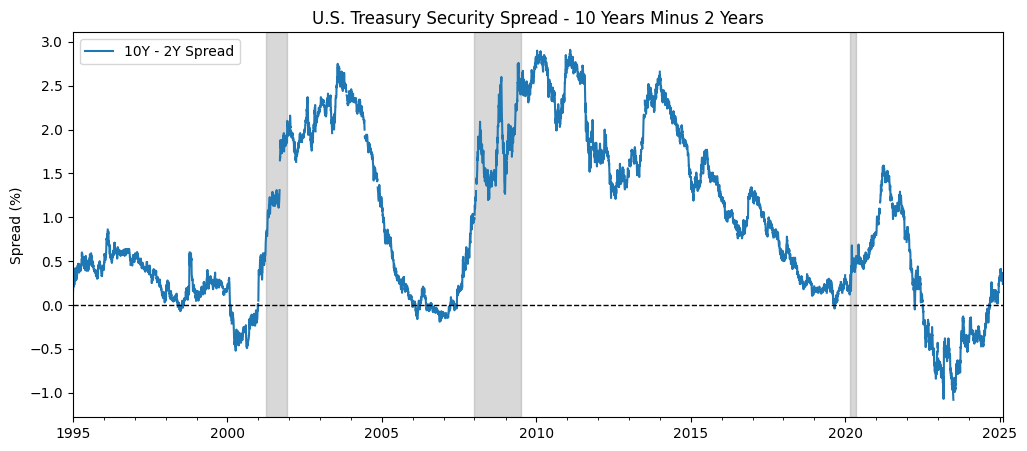

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from fredapi import Fred
from config import fred_api_key  # Ensure you have your FRED API key

try:
    recession_data = pd.read_csv("../data/chapter_01/02_recession_index.csv")
    recession_data.index = pd.to_datetime(recession_data["Unnamed: 0"])
    recession_data.drop(["Unnamed: 0"], axis = 1, inplace = True)
    recession_data = recession_data["0"]
except:
    fred = Fred(api_key=fred_api_key)
    recession_data = fred.get_series("USREC", observation_start="1995-01-01", frequency="m")

treasury_spread = df["10Year"] - df["2Year"]

fig, ax = plt.subplots(figsize=(12, 5))
treasury_spread.plot(ax=ax, label="10Y - 2Y Spread")
for start, end in zip(recession_data[recession_data.diff() == 1].index, 
                      recession_data[recession_data.diff() == -1].index):
    ax.axvspan(start, end, color="gray", alpha=0.3)

ax.set_title("U.S. Treasury Security Spread - 10 Years Minus 2 Years")
ax.set_xlabel("")
ax.set_ylabel("Spread (%)")
ax.axhline(0, color="black", linestyle="--", linewidth=1)  # Mark zero line
ax.legend()
plt.show()

## Derivatives - Options

A derivative is a financial instrument whose value depends on another underlying. Derivatives can be bought at exchange traded and over the counter markets. The former use standardized contracts, while the latter provides the opportunity of individual aggreements.

In this course, we only look at options as a tool to analyze market expectations of stock market participants. Two basic types of options are important in this context, i.e., *put* and *call* options. The call gives the holder of the option the right to buy an asset by a certain date and price. The put gives the holder of the option the right to sell an asset by a certain date and price. 

* the price is called *strike* and usually denoted by $K$
* the date is called *expiration* or *maturity* date and usually denoted by $T$

Two different types of put and call options exist: *European* and *American* options. This has nothing to do with geographical location. European options can only be executed at the expiration date, while American options can always be executed until expiration. If they are executed before expiration, this is called *early excercise*. American options are mostly traded, however, also more complex to analyze.

Let us denote the underlying, i.e., the asset by $S_t$. The payoff for call and put options are:

$$
\text{Call(Payoff)} = \max(S_T - K, 0)
$$


$$
\text{Put(Payoff)} = \max(S_T - K, 0)
$$

Note that this formula uses $T$ in the underlying subscript, $T$ is the time at expiration, thus, to determine an American option call payoff, one needs to replace $S_T$ with $S_t$. A long position in a call or put is the position for the option holder, at the same time, the counterpart in the option contract is the seller of the option and has a short position. The figure below visualizes the payoff for both options and both parties of the option contracts. An option is said to be *in the money* if its current payoff is positive, it is *at the money* if the strike price equals the underlying's value and it is *out of the money* if the current payoff is negative. 

Note that the payoff is not the cash flow both parties receive. As the option holder has the right but must not execute an option, the seller demands a price for this flexibility - the option price, i.e., the amount of money the one in the long position must pay to the one in the short position. Including the price of an option price to the cash flow shifts the payoff profile for both positions as shown by the dashed profiles in the figure below.

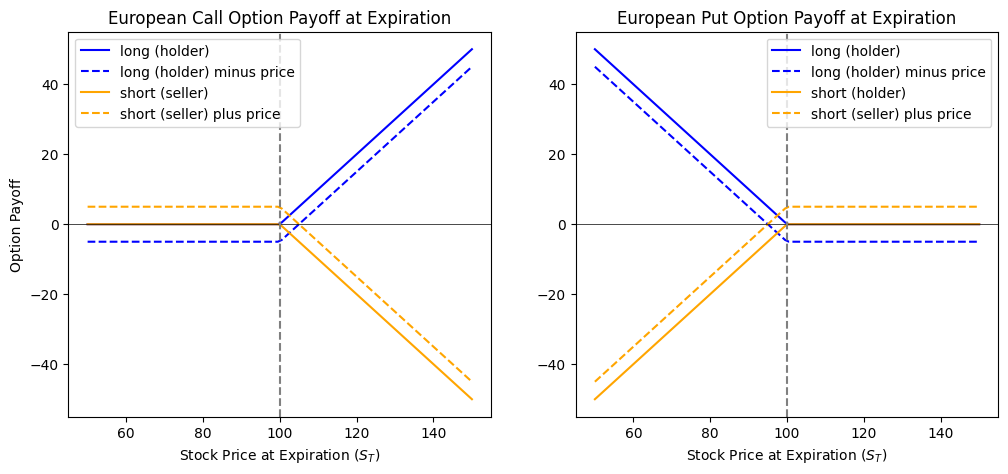

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def european_call_payoff(S_T, K):
    """ Payoff function for a European Call Option at expiration. """
    return max(S_T - K, 0)

def european_put_payoff(S_T, K):
    """ Payoff function for a European Put Option at expiration. """
    return max(K - S_T, 0)


# Define parameters
K = 100  # Strike price
S_range = np.linspace(50, 150, 100)  # Stock price range

# Compute payoffs
call_payoff = np.array([european_call_payoff(S, K) for S in S_range])
put_payoff = np.array([european_put_payoff(S, K) for S in S_range])
call_payoff_minus_price = call_payoff - 5
put_payoff_minus_price = put_payoff - 5

# Plot
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(S_range, call_payoff, label="long (holder)", color = "blue")
axs[0].plot(S_range, call_payoff_minus_price,  linestyle="--", color = "blue", label="long (holder) minus price")
axs[0].plot(S_range, -call_payoff, label="short (seller)", color = "orange")
axs[0].plot(S_range, -call_payoff_minus_price, label="short (seller) plus price", color = "orange", linestyle="--")
axs[0].legend()

axs[1].plot(S_range, put_payoff, label="long (holder)", color = "blue")
axs[1].plot(S_range, put_payoff_minus_price, label="long (holder) minus price", color = "blue", linestyle="--")
axs[1].plot(S_range, -put_payoff, label="short (holder)", color = "orange")
axs[1].plot(S_range, -put_payoff_minus_price, label="short (seller) plus price", color = "orange", linestyle="--")
axs[1].legend()


axs[0].axhline(0, color="black", linewidth=0.5)
axs[0].axvline(K, color="grey", linestyle="--", label="Strike Price")
axs[1].axhline(0, color="black", linewidth=0.5)
axs[1].axvline(K, color="grey", linestyle="--", label="Strike Price")


axs[0].set_xlabel(r"Stock Price at Expiration ($S_T$)")
axs[0].set_ylabel("Option Payoff")
axs[0].set_title("European Call Option Payoff at Expiration")

axs[1].set_xlabel(r"Stock Price at Expiration ($S_T$)")
axs[1].set_title("European Put Option Payoff at Expiration")

plt.show()

The motivation for purchasing options is manifold; however, speculation and hedging are two of the most important drivers of the options market. If market participants expect the underlying asset’s value to rise or fall, they can take a direct position by purchasing (going long) or short-selling the asset. However, by incorporating options into their strategy, they can achieve greater flexibility and leverage. For example, buying call options instead of the asset itself allows investors to gain exposure to upside potential while limiting their downside risk to the option premium. Similarly, put options enable traders to profit from declining prices without the need for short selling.

At the same time, options serve as a risk management tool to hedge against adverse price movements. Consider an investor who holds an asset and also purchases a put option on that asset (a protective put strategy). If the asset’s value declines, the put option appreciates in value, offsetting losses on the asset. This provides downside protection while allowing the investor to participate in potential gains if the asset price rises. Note that options are available to various assets. Examples for the corresponding underlying are stocks, foreign exchange rates, or stock indices.

Determining an option price is a fairly sophisticated task which we omit in this course. Nevertheless, let us take a quick look at two very popular formulas. The Black-Scholes-Merton (BSM) formulas for European call and put options to determine their prices:

European Call Option Price:

$$
C = S_0 N(d_1) - K e^{-rT} N(d_2)
$$

European Put Option Price:

$$
P = K e^{-rT} N(-d_2) - S_0 N(-d_1)
$$

Where:

$$
d_1 = \frac{\ln \left(\frac{S_0}{K} \right) + \left(r + \frac{\sigma^2}{2} \right)T}{\sigma \sqrt{T}}
$$

$$
d_2 = d_1 - \sigma \sqrt{T}
$$

Explanation of Terms:
* $C$: European call option price
* $P$: European put option price
* $S_0$: Current stock price
* $K$: Strike price of the option
* $T$: Time to expiration (in years)
* $r$: Risk-free interest rate (annualized)
* $\sigma$: Volatility of the stock (annualized)
* $N(d)$: Cumulative distribution function (CDF) of the standard normal distribution

The derivation of these formulas is done under the following assumptions:

* The market is arbitrage-free, meaning there are no riskless profit opportunities.
* The underlying asset price follows a geometric Brownian motion (GBM) with constant drift and volatility. Prices move continuously without sudden jumps (i.e., no extreme gaps in price).
* The risk-free rate $r$ is constant and known over the life of the option.
* The volatility $\sigma$ of the underlying asset remains constant over time.
* The model only applies to European options, which can be exercised only at expiration, not before.
* No transaction costs
* Traders can continuously adjust their positions to hedge risk perfectly.
* The underlying asset does not pay dividends (though this assumption is modified in dividend-adjusted versions of the model).
* Investors can borrow and lend money at the risk-free rate. Short selling is allowed without restriction.

To give you an idea, how option prices vary with their underlying parameters, let us take a look at put and call option prices whose default parameters are:

* $K = 100$
* $T$ = 1
* $r$ = 0.05
* $\sigma$ = 0.20

The figure below illustrates how the put and call prices change for this contract by $S$, $\sigma$, $K$ and $T$:
* Stock Price ( $S$ ) Sensitivity
    * Call options increase in value as the stock price rises.
    * Put options decrease in value as the stock price rises.
* Volatility ( $\sigma$ ) Sensitivity
    * Both call and put options increase in price as volatility increases.
    * This is because higher volatility raises the probability of extreme moves, benefiting options.
* Time to Expiration ( $T$ ) Sensitivity
    * Call and put options generally increase with more time remaining (due to time value).
    * However, deep in-the-money or out-of-the-money options may behave differently.
* Strike Price ( $K$ ) Sensitivity
    * Call options decrease as the strike price increases (it becomes more expensive to exercise).
    * Put options increase as the strike price increases.

Note, a more formal approach (that we omit here) to quantify sensitivities is provided by the *Greeks* which are partial derivatives of option prices to their parameters. 

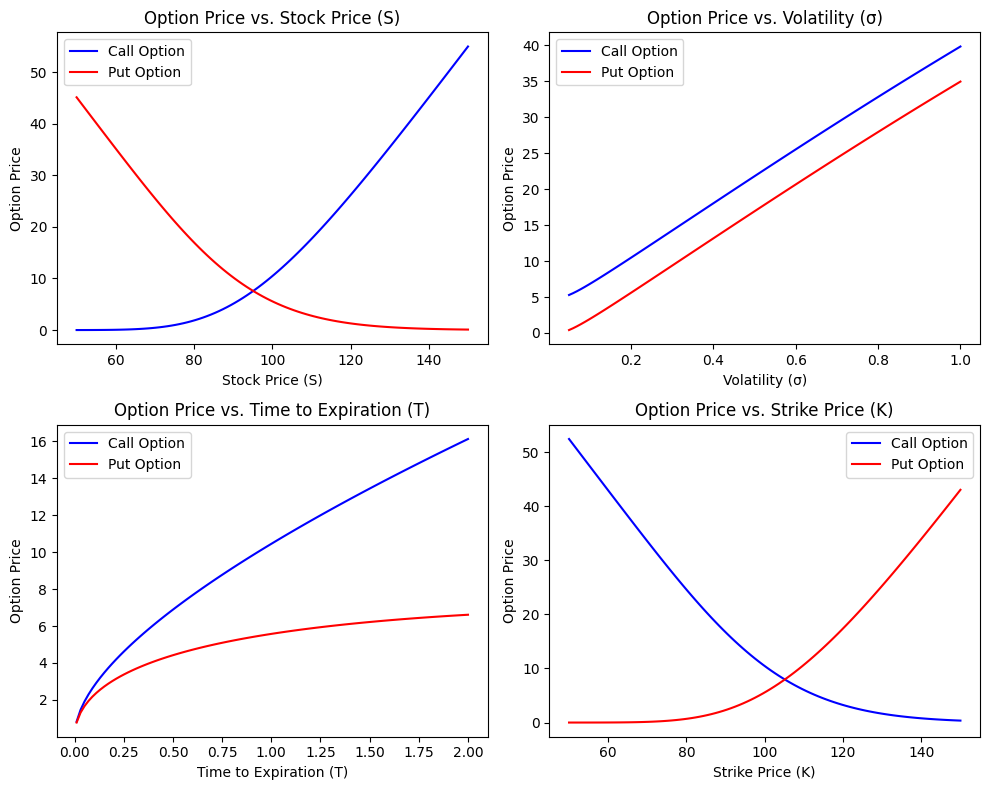

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes formula for European call and put options
def black_scholes(S, K, T, r, sigma, option_type="call"):
    if T <= 0:
        return max(0, S - K) if option_type == "call" else max(0, K - S)

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

# Define base parameters
K = 100      # Strike price
T = 1        # Time to expiration (1 year)
r = 0.05     # Risk-free rate (5%)
sigma = 0.2  # Volatility (20%)
S_range = np.linspace(50, 150, 100)  # Range for stock price
sigma_range = np.linspace(0.05, 1, 100)  # Range for volatility
T_range = np.linspace(0.01, 2, 100)  # Range for time to expiration
K_range = np.linspace(50, 150, 100)  # Range for strike prices

# Compute sensitivities
call_prices_S = [black_scholes(S, K, T, r, sigma, "call") for S in S_range]
put_prices_S = [black_scholes(S, K, T, r, sigma, "put") for S in S_range]

call_prices_sigma = [black_scholes(K, K, T, r, sigma_, "call") for sigma_ in sigma_range]
put_prices_sigma = [black_scholes(K, K, T, r, sigma_, "put") for sigma_ in sigma_range]

call_prices_T = [black_scholes(K, K, T_, r, sigma, "call") for T_ in T_range]
put_prices_T = [black_scholes(K, K, T_, r, sigma, "put") for T_ in T_range]

call_prices_K = [black_scholes(K, K_, T, r, sigma, "call") for K_ in K_range]
put_prices_K = [black_scholes(K, K_, T, r, sigma, "put") for K_ in K_range]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Stock Price Sensitivity
axes[0, 0].plot(S_range, call_prices_S, label="Call Option", color="blue")
axes[0, 0].plot(S_range, put_prices_S, label="Put Option", color="red")
axes[0, 0].set_title("Option Price vs. Stock Price (S)")
axes[0, 0].set_xlabel("Stock Price (S)")
axes[0, 0].set_ylabel("Option Price")
axes[0, 0].legend()

# Volatility Sensitivity
axes[0, 1].plot(sigma_range, call_prices_sigma, label="Call Option", color="blue")
axes[0, 1].plot(sigma_range, put_prices_sigma, label="Put Option", color="red")
axes[0, 1].set_title("Option Price vs. Volatility (σ)")
axes[0, 1].set_xlabel("Volatility (σ)")
axes[0, 1].set_ylabel("Option Price")
axes[0, 1].legend()

# Time to Expiration Sensitivity
axes[1, 0].plot(T_range, call_prices_T, label="Call Option", color="blue")
axes[1, 0].plot(T_range, put_prices_T, label="Put Option", color="red")
axes[1, 0].set_title("Option Price vs. Time to Expiration (T)")
axes[1, 0].set_xlabel("Time to Expiration (T)")
axes[1, 0].set_ylabel("Option Price")
axes[1, 0].legend()

# Strike Price Sensitivity
axes[1, 1].plot(K_range, call_prices_K, label="Call Option", color="blue")
axes[1, 1].plot(K_range, put_prices_K, label="Put Option", color="red")
axes[1, 1].set_title("Option Price vs. Strike Price (K)")
axes[1, 1].set_xlabel("Strike Price (K)")
axes[1, 1].set_ylabel("Option Price")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

The only variable that needs to be estimated to determine an option’s price is its volatility $\sigma$, as the strike price and maturity are usually fixed by contract design. The risk-free rate is typically inferred from short-term risk-free financial instruments such as Treasury bills, government bonds, or other high-quality short-term debt instruments.

In this course, we will explore different ways to estimate volatility using historical data, which provides a backward-looking perspective. However, options can be used to infer implied volatility, which reflects market participants’ forward-looking expectations of future asset price fluctuations. To determine implied volatility, one must collect price data from existing options along with their contract parameters.

The simplest method for determining implied volatility is to solve the Black-Scholes formula for $\sigma$ at a given market price. However, since an explicit analytical solution does not exist, $\sigma$ must be determined numerically using an iterative search method, such as the Newton-Raphson algorithm.

For example, consider a call option with $S_0 = 95 ,  K = 100 ,  T = 1 ,  r = 0.05$, and a market price of $7.7$. Plugging in $\sigma = 0.20$ into the Black-Scholes formula gives $C = 7.51$, while $\sigma = 0.21$ gives $C = 7.89$. This implies that the true implied volatility lies between $0.20 < \sigma < 0.21$. In this case, the exact implied volatility is approximately $\sigma = 0.205$. At this price, market participants are expecting an annualized volatility of 20.5\% until maturity.

Contrary to the original assumptions of Black and Scholes, implied volatilities vary with strike price and maturity. Options with extreme strike-to-stock price ratios typically exhibit higher implied volatilities, forming what is known as the volatility smile. Similarly, options with different maturities often display different implied volatilities, forming a volatility term structure. These deviations arise due to market imperfections, stochastic volatility, jump processes, and other factors that Black-Scholes does not account for.

A key application of implied volatility is in volatility indices, which aggregate the market’s expectations of future volatility. The most well-known example is the VIX (CBOE Volatility Index), which derives implied volatilities from European-style options on the S&P 500 index. The VIX is constructed using near-term options (with maturities close to 30 days), aggregated and annualized to form a measure of expected market volatility over the next year. Due to its tendency to spike during market stress, the VIX is often referred to as the “fear index.”

Similar volatility indices exist for other asset classes, including bonds. A notable example is the MOVE index, which measures the implied volatility of U.S. Treasury bonds and reflects uncertainty in the interest rate markets.

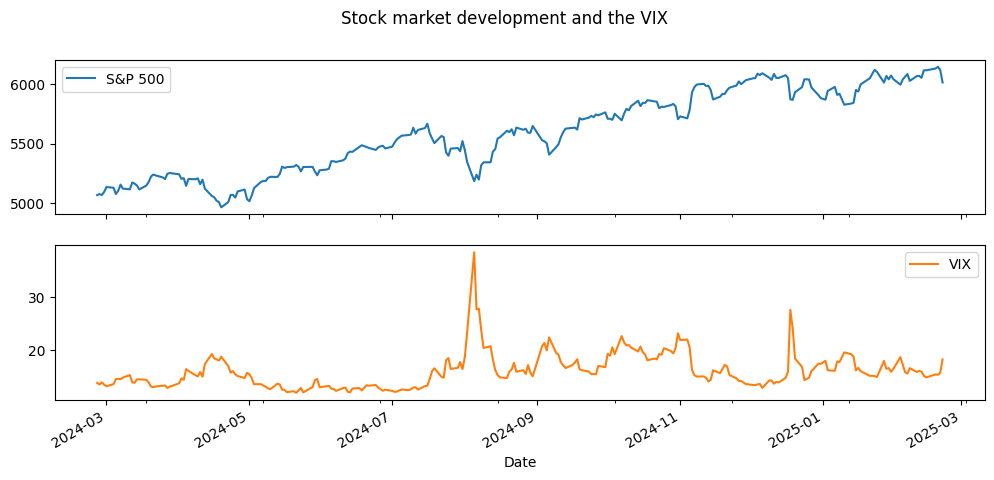

In [30]:
import yfinance as yf
import matplotlib.pylab as plt
import pandas as pd

try:
    close_observations = pd.read_csv("../data/chapter_01/03_vix.csv")
    close_observations.index = pd.to_datetime(close_observations["Date"])
    close_observations.drop(["Date"], axis = 1, inplace=True)
except:
    tickers = ["^SPX", "^VIX"]
    today = pd.Timestamp.today().normalize()
    one_year_ago = today - pd.DateOffset(days=365)

    ohlc_data = yf.download(tickers, start = one_year_ago, end = today)
    close_observations = ohlc_data.loc[:, "Close"]
    close_observations.to_csv("../data/chapter_01/03_vix.csv")

close_observations.rename({"^SPX": "S&P 500", "^VIX": "VIX"}, axis = 1, inplace = True)
close_observations.get(["S&P 500", "VIX"]).plot(subplots = True, title = "Stock market development and the VIX", figsize = (12, 5))
plt.show()